## 6.5 Machine Learning_Clustering

### This script contains the following:

#### 01 Importing libraries, data, & filtering columns
#### 02 The Elbow Technique & # of clusters
#### 03 k-means Clustering
#### 04 Discussing the cluster results
#### 05 Thoughts on using results for future analysis
#### 06 EXTRA: Additional review of balance of variables

# 01 Importing libraries, data, & filtering columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import scipy
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
#create data path
path = r'C:\Users\fa_an\OneDrive\CareerFoundry\Tasks\Data Analytics Immersion\Tasks 6.1-6.7'

In [4]:
#df = WHR_all
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'WHR_all.pkl'))

In [5]:
df.shape

(1505, 12)

In [6]:
df.head()

,Country,Year,Region,Happiness Rank,Happiness Score,GDP,Social Support,Life Expectancy,Freedom,Generosity,Corruption,Dystopia + Residual
0,Afghanistan,2023,Southern Asia,137,1.859,0.645,0.000,0.087,0.000,0.093,0.059,0.975
1,Afghanistan,2017,Southern Asia,141,3.794,0.401,0.582,0.181,0.106,0.312,0.061,2.151
2,Afghanistan,2018,Southern Asia,145,3.632,0.332,0.537,0.255,0.085,0.191,0.036,2.196
3,Afghanistan,2022,Southern Asia,146,2.404,0.758,0.000,0.289,0.000,0.089,0.005,1.263
4,Afghanistan,2021,Southern Asia,149,2.523,0.370,0.000,0.126,0.000,0.122,0.010,1.895


In [7]:
#filter df (do not include:categorical and Year columns) leave only numerical value columns
df = df[['Happiness Score', 'GDP', 'Social Support', 'Life Expectancy', 'Freedom', 'Generosity', 'Corruption']]
df.head()

,Happiness Score,GDP,Social Support,Life Expectancy,Freedom,Generosity,Corruption
0,1.859,0.645,0.000,0.087,0.000,0.093,0.059
1,3.794,0.401,0.582,0.181,0.106,0.312,0.061
2,3.632,0.332,0.537,0.255,0.085,0.191,0.036
3,2.404,0.758,0.000,0.289,0.000,0.089,0.005
4,2.523,0.370,0.000,0.126,0.000,0.122,0.010


In [8]:
# Check if there are any non-numeric values in the DataFrame
# You may need to convert non-numeric columns to numeric or drop them
print(df.dtypes)

Happiness Score    float64
GDP                float64
Social Support     float64
Life Expectancy    float64
Freedom            float64
Generosity         float64
Corruption         float64
dtype: object


In [9]:
# Check for missing values
df.isnull().sum()

Happiness Score    0
GDP                0
Social Support     0
Life Expectancy    0
Freedom            0
Generosity         0
Corruption         0
dtype: int64

# 02 The Elbow Technique &  # of clusters

In [10]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [11]:
# Creates a score that represents a rate of variation for the given cluster option.
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]

score


C:\Users\fa_an\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\fa_an\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\fa_an\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\fa_an\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

[-2559.259073367442,
 -1012.4352350449897,
 -692.5832134382314,
 -535.5058980942179,
 -457.4941708507584,
 -420.88552764954176,
 -390.66199126185205,
 -364.68489995452694,
 -348.13310602861236]

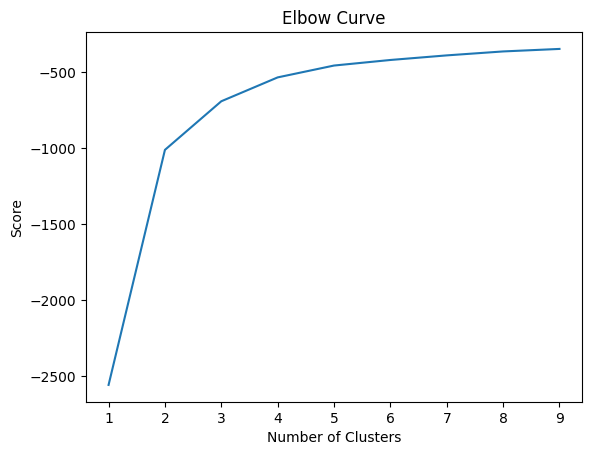

In [12]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

# Make an informed decision about the number of clusters you’ll use in your k-means algorithm based on the chart.

#### Explain why you chose that number in a markdown cell.

#### In this example, there's a large jump from 4 to 5 on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is three. Which oddly enough shows the top 5 highly correlated variables.

# 03 k-means Clustering

In [13]:
# Create the k-means object. This number is based on the Elbow Curve results above. 

kmeans = KMeans(n_clusters = 5) 


In [14]:
# Fit the k-means object to the data.

kmeans.fit(df)

C:\Users\fa_an\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\fa_an\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


KMeans(n_clusters=5)

In [15]:
df['clusters'] = kmeans.fit_predict(df)

C:\Users\fa_an\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\fa_an\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


In [16]:
df.head()

,Happiness Score,GDP,Social Support,Life Expectancy,Freedom,Generosity,Corruption,clusters
0,1.859,0.645,0.000,0.087,0.000,0.093,0.059,4
1,3.794,0.401,0.582,0.181,0.106,0.312,0.061,4
2,3.632,0.332,0.537,0.255,0.085,0.191,0.036,4
3,2.404,0.758,0.000,0.289,0.000,0.089,0.005,4
4,2.523,0.370,0.000,0.126,0.000,0.122,0.010,4


In [17]:
df['clusters'].value_counts()

clusters
0    404
1    362
3    339
2    232
4    168
Name: count, dtype: int64

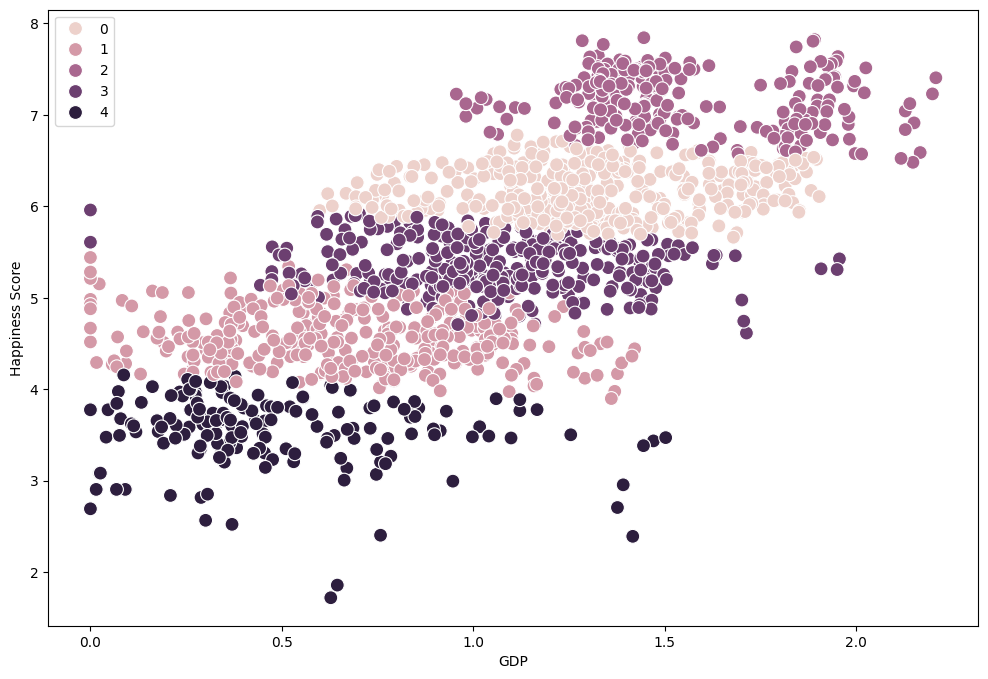

In [18]:
# Plot the clusters for the "Happiness Score" and "GDP" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['GDP'], y=df['Happiness Score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('GDP') # Label x-axis.
plt.ylabel('Happiness Score') # Label y-axis.
plt.show()

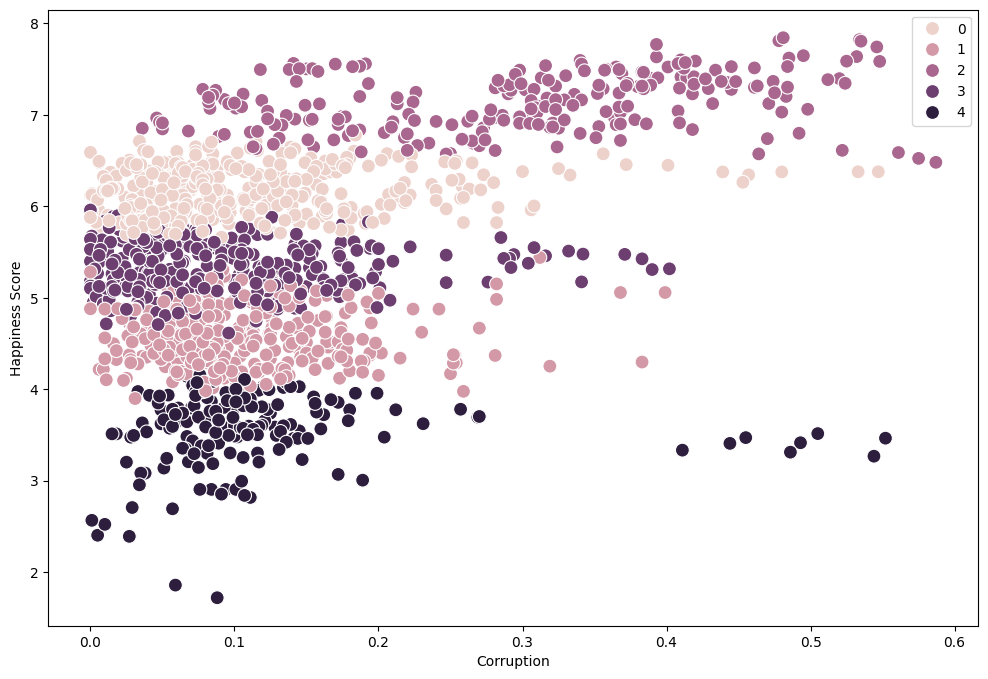

In [19]:
# Plot the clusters for the "Corruption" and "Happiness Score" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Corruption'], y=df['Happiness Score'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Corruption') 
plt.ylabel('Happiness Score') 
plt.show()

# 04 Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further.

#### To me the clusters make total sense! In the first plot with GDP v Happiness Score you can see that Group 1 (pink), which is the populated, shows that countries with a score between 6 and 7 have GDP between 0.6 and 1.75, but most concentrated between 1 and 1.5. They aren't the happiest, but close to it. The unhappiest, Group 4 (dark purple) shows that scores are mostly between 3 and 4, with GDP between 0.25 and 0.50. Higher Happiness Scores have higher GDP. The total overall graphic of clusters also shows a pattern, a horde similar to a upward positive trend.

#### The second plot showing Corruption v Happiness score, you can see that Group 2 (dark pink) have higher Happiness Scores but the idea or trust in government/idea of corruption is fairly evenly spread out. Which means MORE trust in government/less corruption. Obviously, this is the opposite for the UnHappiest countries, which feel their governments cannot be trusted and that there is more corruption.

In [20]:
df.loc[df['clusters'] == 4, 'clusters'] ='dark puple'
df.loc[df['clusters'] == 3, 'clusters'] = 'purple'
df.loc[df['clusters'] == 2, 'clusters'] = 'dark pink'
df.loc[df['clusters'] == 1, 'clusters'] = 'pink'
df.loc[df['clusters'] == 0, 'clusters'] = 'light pink'

C:\Users\fa_an\AppData\Local\Temp\ipykernel_152892\3582610428.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'dark puple' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[df['clusters'] == 4, 'clusters'] ='dark puple'


In [21]:
df.groupby('clusters').agg({'Freedom':['mean', 'median'],
                            'Life Expectancy':['mean', 'median'], 
                             'Social Support':['mean', 'median'], 
                             'GDP':['mean', 'median'],
                              'Happiness Score':['mean', 'median']})

Freedom         Life Expectancy         Social Support          \
                mean  median            mean  median           mean  median   
clusters                                                                      
dark pink   0.620254  0.6225        0.801478  0.8095       1.341142  1.3890   
dark puple  0.334292  0.3635        0.288667  0.2760       0.635119  0.6315   
light pink  0.527413  0.5425        0.689963  0.6845       1.233493  1.2640   
pink        0.393412  0.4040        0.394470  0.3790       0.824144  0.8370   
purple      0.430097  0.4510        0.622410  0.6370       1.085224  1.1340   

                 GDP         Happiness Score          
                mean  median            mean  median  
clusters                                              
dark pink   1.560052  1.4795        7.139474  7.1260  
dark puple  0.484690  0.3875        3.534339  3.5920  
light pink  1.307619  1.2850        6.157609  6.1385  
pink        0.691232  0.6895        4.565782  4.5465  
purple      1.055186  1.0320        5.338832  5.3160

In [22]:
df.head()

,Happiness Score,GDP,Social Support,Life Expectancy,Freedom,Generosity,Corruption,clusters
0,1.859,0.645,0.000,0.087,0.000,0.093,0.059,dark puple
1,3.794,0.401,0.582,0.181,0.106,0.312,0.061,dark puple
2,3.632,0.332,0.537,0.255,0.085,0.191,0.036,dark puple
3,2.404,0.758,0.000,0.289,0.000,0.089,0.005,dark puple
4,2.523,0.370,0.000,0.126,0.000,0.122,0.010,dark puple


# 05 Propose what these results could be useful for in future steps of an analytics pipeline.

#### These results can be useful in several ways: Helping to identifying certain cohort characteristics, being able to compare across the cluster groups, feature selection for modeling, providing valuable insights, and/or helping to refine the clusters further.

# 06 EXTRA

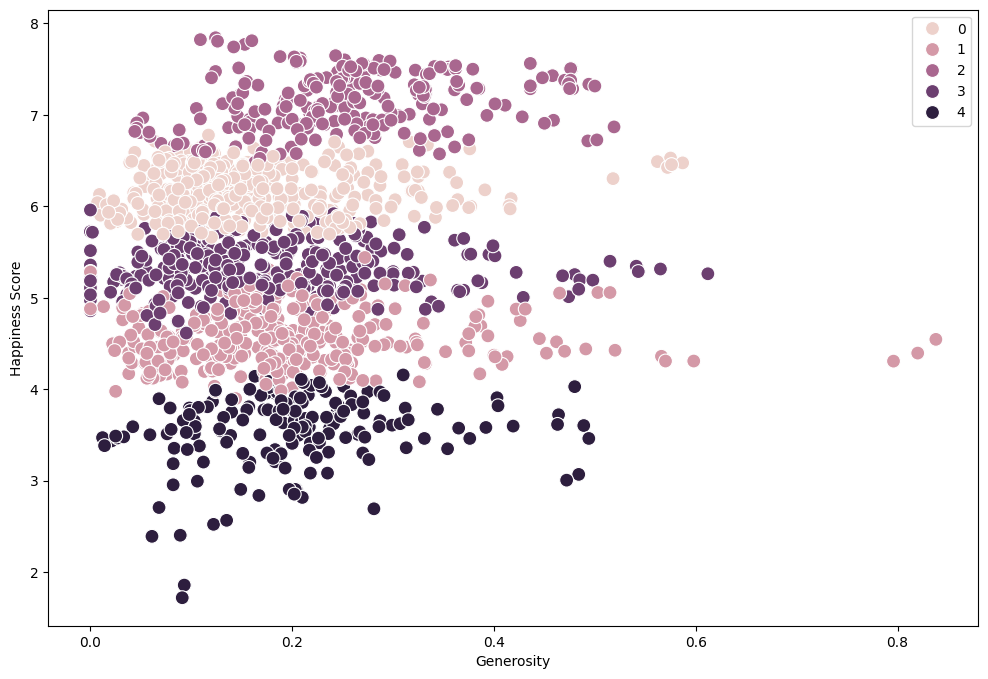

In [23]:
# Plot the clusters for the "Generosity" and "Happiness Score" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Generosity'], y=df['Happiness Score'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Generosity') 
plt.ylabel('Happiness Score') 
plt.show()

#### I also really find it interesting that Generosity is clustered the between 0.025 and 0.25 across all cohorts/groups! There's only a small select group of countries from from groups 2,4, 1, and 0 that show more Generosity or helping others out. One would think the most Happiest countries are highly generous and the UnHappiest not so much. However, it's pretty even. Which to me means, that Generosity probably doesn't attribute too much to the overall score, but it's a variable that one would logically think would follow the same sort of pattern as GDP, Social Support, Life Expectancy, and Freedom (which I did quickly look at those separately). Those all had highly similar patterns when put onto a plot. Generosity and Corruption are the two that are the most different compared to the rest.

# Life Expectancy series

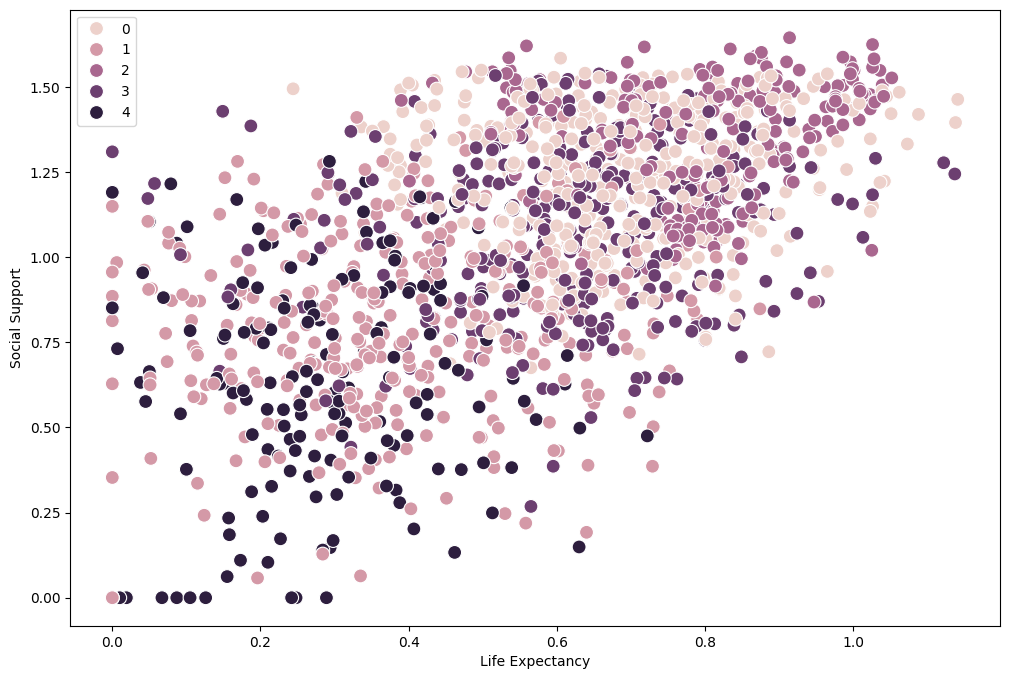

In [24]:
# Plot the clusters for the "Life Expectancy" and "Social Support" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Life Expectancy'], y=df['Social Support'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Life Expectancy') 
plt.ylabel('Social Support') 
plt.show()

#### I think this is also very interesting. That Life Expectancy is higher based on having more Social Support. This is not among specific hordes, but all of them. The only group that this effects less is Group 0 and 3. In these groups, it shows that they have a lower perception of life expectancy based on having some Social Support, but perhaps there are some other factors creating this lower view. Anything from healthcare infrastructure, policies, socioeconomic inequalities, and/or lifestyle behaviors.

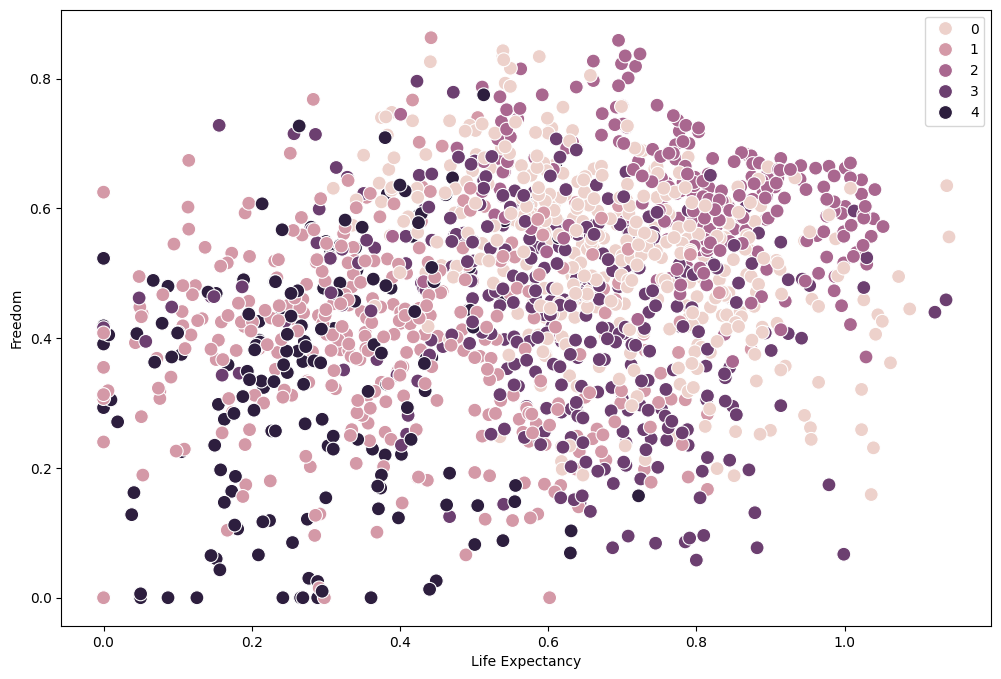

In [25]:
# Plot the clusters for the "Life Expectancy" and "Freedom" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Life Expectancy'], y=df['Freedom'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Life Expectancy') 
plt.ylabel('Freedom') 
plt.show()

#### In this scatter plot, you can see that a majority of Group 4, 2, and 1 show a higher Life Expectancy with more Freedom. Interesting enough Group 0 and 3 show lower Life Expectancy and Freedom.

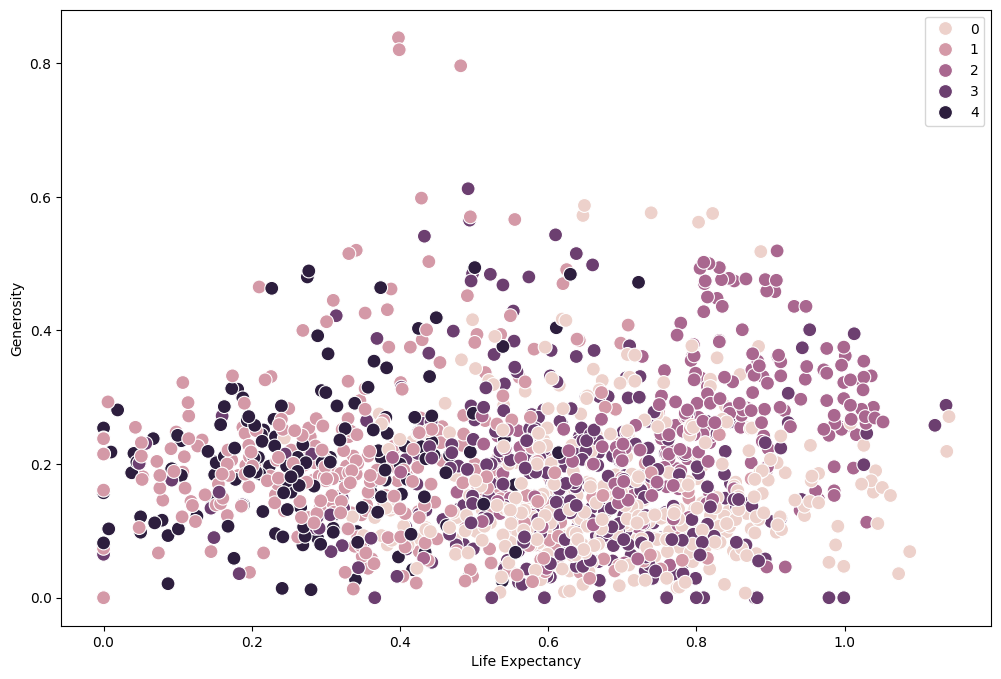

In [26]:
# Plot the clusters for the "Life Expectancy" and "Generosity" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Life Expectancy'], y=df['Generosity'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Life Expectancy') 
plt.ylabel('Generosity') 
plt.show()

#### Group 4 here shows less Generosity and lower life Expectancy. Where as the rest of the clusters show about the same level of Generosity but higher Life Expectancy.

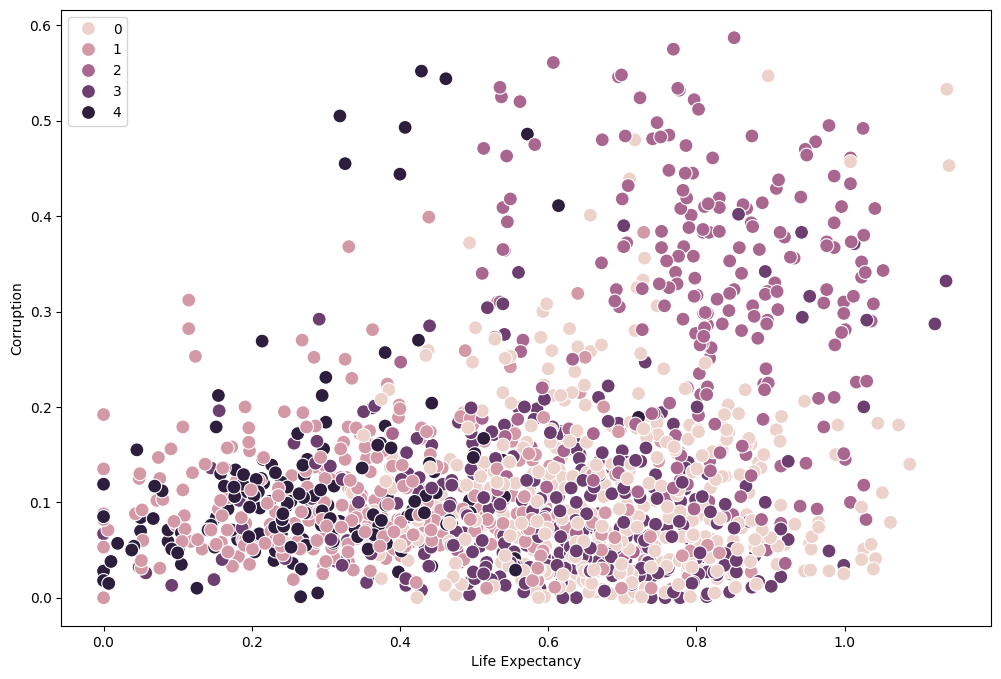

In [27]:
# Plot the clusters for the "Life Expectancy" and "Corruption" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Life Expectancy'], y=df['Corruption'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Life Expectancy') 
plt.ylabel('Corruption') 
plt.show()

#### Here you can see that Group 4 has less trust in government/more corruption equates to a lower perception of Life Expectancy. Group 2 has a higher trust in government/less corruption but a higer perception of Life Expectancy.

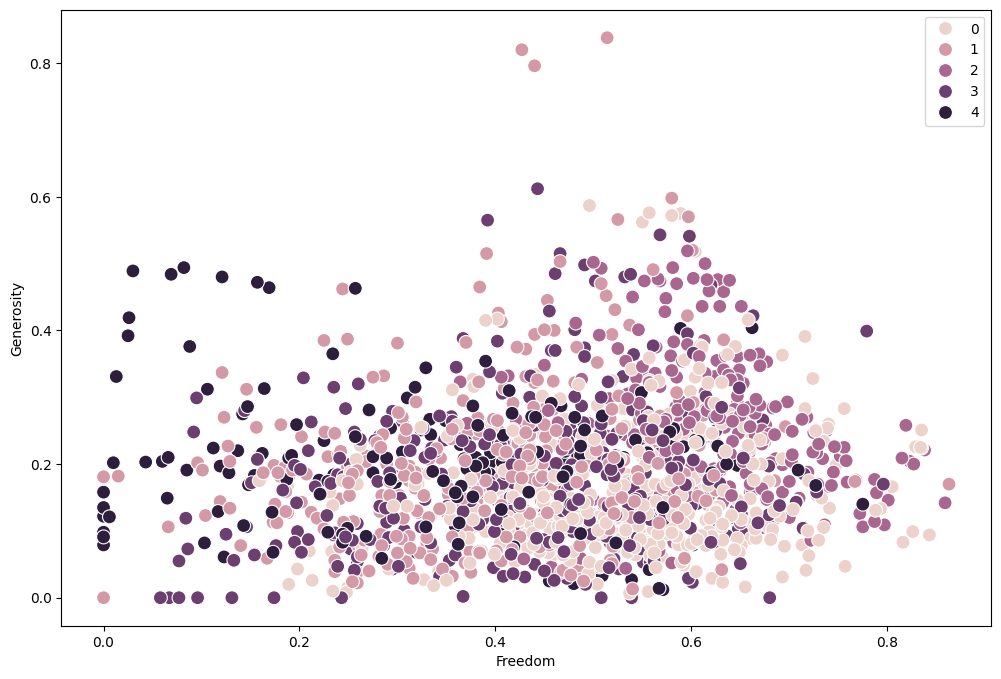

In [28]:
# Plot the clusters for the "Freedom" and "Generosity" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Freedom'], y=df['Generosity'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Freedom') 
plt.ylabel('Generosity') 
plt.show()

#### The majority of the plot shows less Generosity amongst all groups based on different levels of Freedom. You can see that there are very few that are highly Generous with more Freedom.

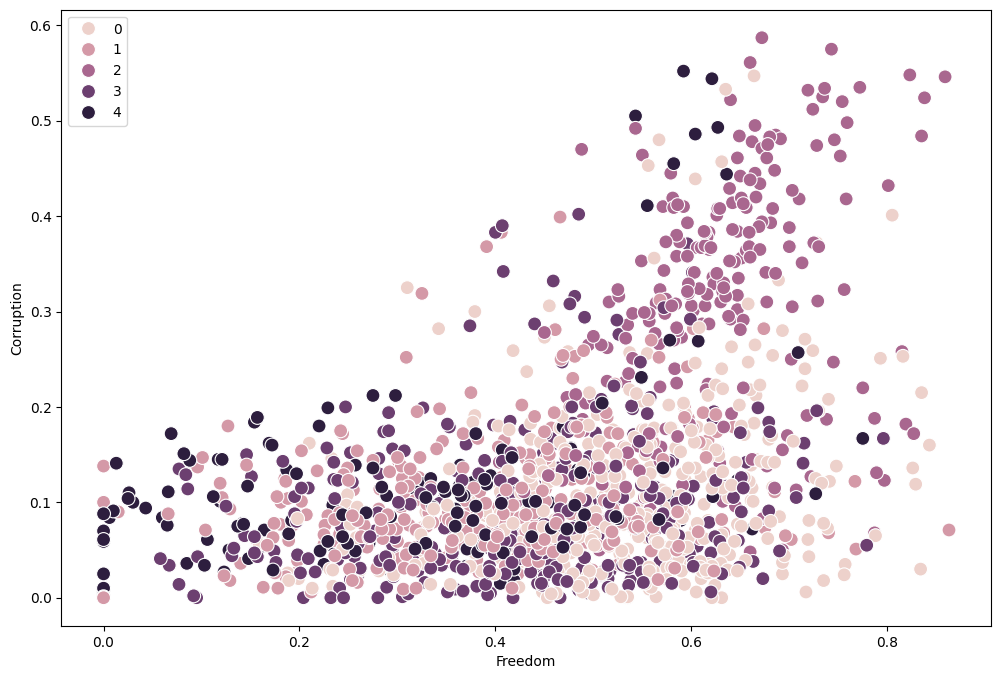

In [29]:
# Plot the clusters for the "Freedom" and "Corruption" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Freedom'], y=df['Corruption'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Freedom') 
plt.ylabel('Corruption') 
plt.show()

#### Here this plot shows Group 2 with the higher trust in government/less corruption with more Freedom. Group 4 shows alot lower trust in government/high corruption with lower Freedom.

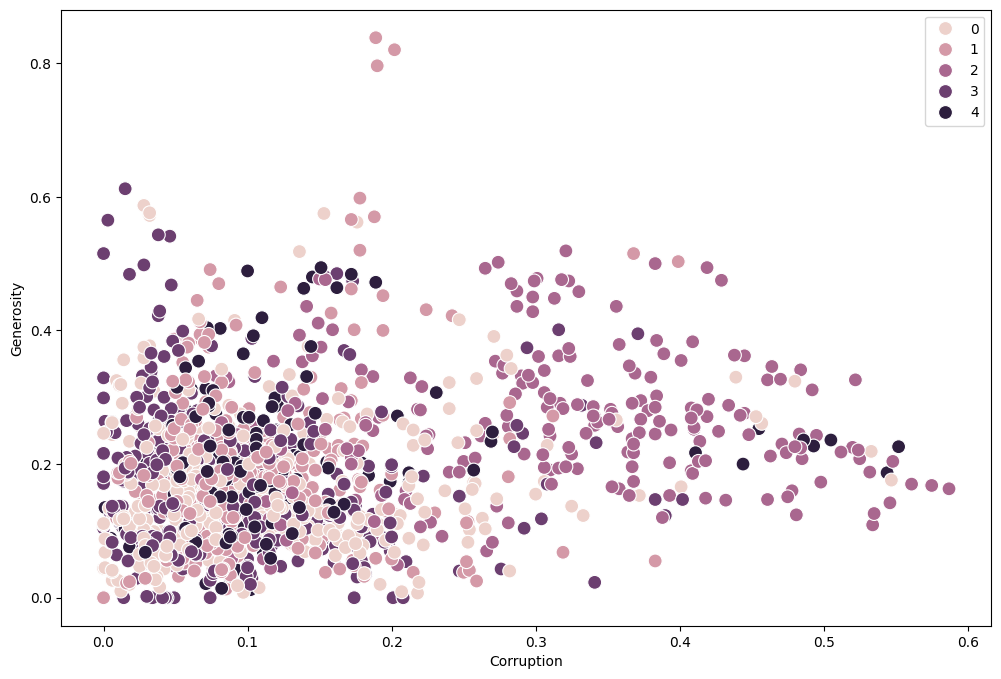

In [31]:
# Plot the clusters for the "Corruption" and "Generosity" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Corruption'], y=df['Generosity'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Corruption') 
plt.ylabel('Generosity') 
plt.show()

#### In this scatterplot with Generosity v Corruption you can see that a majority of the countries fall into the idea of Less Generosity due to less trust in government and more corruption.